# Plotting maps using Python
  
This script shows how to create maps using the `matplotlib` and `cartopy` libraries from Python. A few other libraries, such as `xarray` will be used to load and manipulate environmental data available as a netcdf file.

In [1]:
#Load and manipulate large datasets
import xarray as xr
#Manipulate data
import numpy as np
#Nice colourmaps
import cmocean as cm
#To create plots
import matplotlib.pyplot as plt
#To add projections to maps
import cartopy.crs as ccrs
#To load features to maps
import cartopy.feature as cft 

In [2]:
#If you want plots to appear in this notebook, add the following line
%matplotlib inline

## Loading environmental data
For this exercise, we will use outputs from an oceanographic model, ACCESS-OM2-01, specifically we will use monthly sea surface temperature (SST) means for the Southern Ocean.

In [4]:
#We will open the data set using xarray, which will create a data array object
SO_SST = xr.open_dataarray('../Data/SST_corrlon.nc')

#And we will call the data array to see a summary of its contents
SO_SST

<xarray.DataArray 'surface_temp' (yt_ocean: 740, xt_ocean: 3600)>
[2664000 values with dtype=float32]
Coordinates:
  * xt_ocean     (xt_ocean) float64 -179.9 -179.8 -179.7 ... 179.7 179.8 179.9
  * yt_ocean     (yt_ocean) float64 -81.11 -81.07 -81.02 ... -45.11 -45.04
    time         datetime64[ns] ...
    spatial_ref  int64 ...
Attributes:
    grid_mapping:  spatial_ref

**Creating a quick plot**  
We can simply add `.plot()` at the end of the variable name

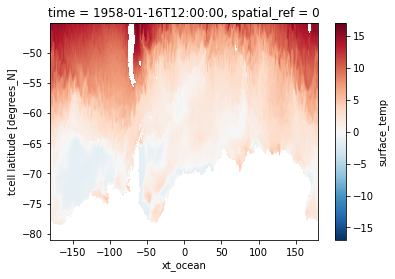

In [5]:
#This produces a decent plot, we can see patterns in SST, but it is not visually appealling
SO_SST.plot()

This option shows us a map of Antarctic without any projections. It simply uses the latitude and longitudes to plot the SST data.  
We can improve the map above by assigned a projection using the library `cartopy`.

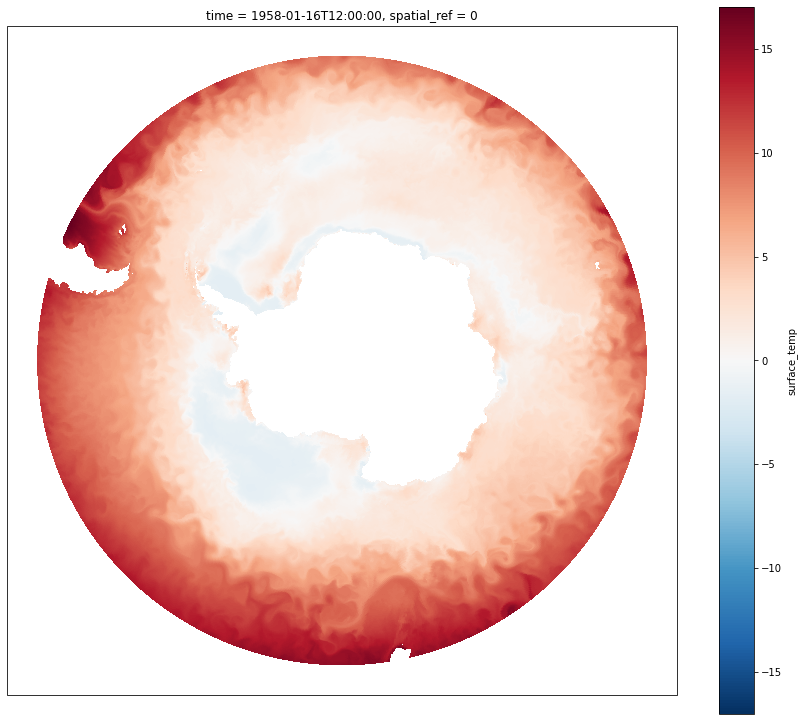

In [6]:
#Let's start a figure and set its size
fig = plt.figure(figsize = (15, 13))

#Let's set a suitable projection for our map
projection = ccrs.SouthPolarStereo()

#Now let's define draw the map within the figure
mapSO = fig.add_subplot(1, 1, 1, projection = projection)
#Note that the three ones above refer to number of rows, number of columns, and the index of the plot 

#The simple plotting option will not allow us to use a projection, so we will use the pcolormesh plot type
SO_SST.plot.pcolormesh(ax = mapSO, transform = ccrs.PlateCarree())

The plot above looks good, but we can improve it a little more. We will built up on the code above.

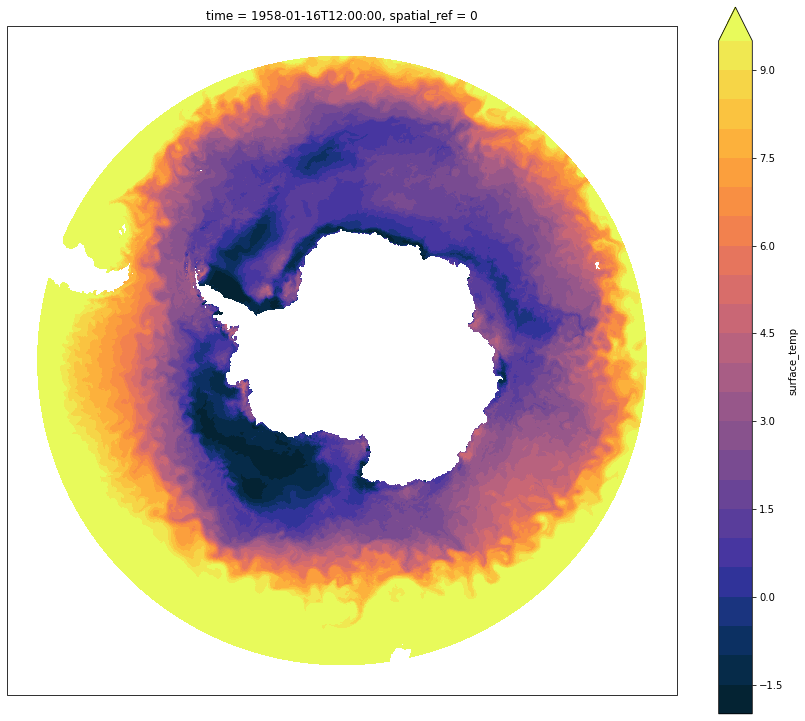

In [7]:
#We use the same three lines of the code above 
fig = plt.figure(figsize = (15, 13))
projection = ccrs.SouthPolarStereo()
mapSO = fig.add_subplot(1, 1, 1, projection = projection)

#We will improve the map above
#We saw above that the colourbar is the same for positive and negative values. However, sea water will not get colder than ~ -1.8 degrees because at that point it will turn to ice
#We will define the levels of our data
levels = np.arange(-2, 10, 0.5)

#We now start improving our map
SO_SST.plot.pcolormesh(ax = mapSO, transform = ccrs.PlateCarree(),
                       #By changing the colourmap and setting maximum and minimum values for the colourbar
                       cmap = cm.cm.thermal, levels = levels,
                       #Allow an arrow to be drawn for upper SST values
                       extend = 'max')

In [8]:
#If you would like to check the minimum SST value in this data array, run the line of code below
SO_SST.min().values

array(-1.77340698)

The map is looking better and now we can still improve it by adding a land mask and fixing the colourbar so zero is set as the center.

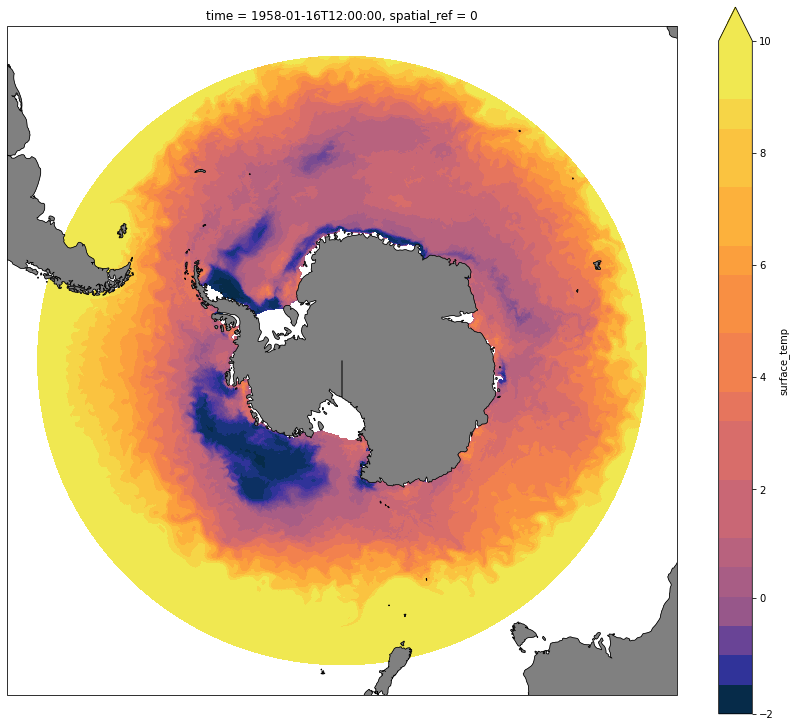

In [9]:
#We use the same four lines of the code above 
fig = plt.figure(figsize = (15, 13))
projection = ccrs.SouthPolarStereo()
mapSO = fig.add_subplot(1, 1, 1, projection = projection)
levels = np.arange(-2, 10, 0.5)

#We will now call a layer from the cartopy package that contains land features
land = cft.NaturalEarthFeature('physical', 'land', '50m', 
                               #This changes the colour and width of the border for the land layer
                               edgecolor = 'black', linewidth = 0.5,
                               #This changes the fill colour
                               facecolor = 'gray')

#We will set our colourbar to be centered at zero - Note that we use the same maximum and minimum values as we set in our levels variable
#First we must import a library
import matplotlib.colors as mcolors
divnorm = mcolors.TwoSlopeNorm(vmin = -2, vcenter = 0, vmax = 10)

#We now start improving our map
SO_SST.plot.pcolormesh(ax = mapSO, transform = ccrs.PlateCarree(),
                       #By changing the colourmap and setting maximum and minimum values for the colourbar
                       cmap = cm.cm.thermal, levels = levels,
                       #Allow an arrow to be drawn for upper SST values
                       extend = 'max',
                       #We will now set our colourbar to be centered at zero
                       norm = divnorm)

#Add land layer
mapSO.coastlines(resolution = '50m')
mapSO.add_feature(land)

We can improve it a little more, we can change the size of the colourbar and add a title to the plot

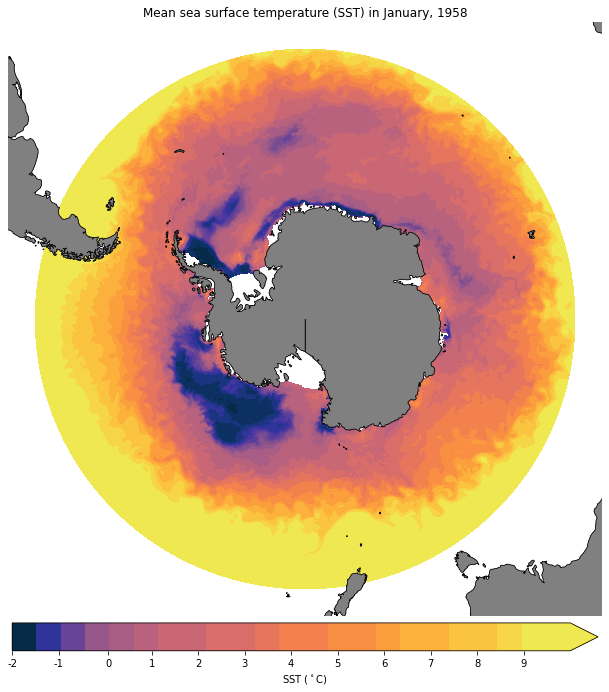

In [10]:
#We use the the code above 
fig = plt.figure(figsize = (15, 13))
projection = ccrs.SouthPolarStereo()
mapSO = fig.add_subplot(1, 1, 1, projection = projection)
levels = np.arange(-2, 10, 0.5)
land = cft.NaturalEarthFeature('physical', 'land', '50m', 
                               #This changes the colour and width of the border for the land layer
                               edgecolor = 'black', linewidth = 0.5,
                               #This changes the fill colour
                               facecolor = 'gray')
divnorm = mcolors.TwoSlopeNorm(vmin = -2, vcenter = 0, vmax = 10)

#We now start improving our map
SO = SO_SST.plot.pcolormesh(ax = mapSO, transform = ccrs.PlateCarree(),
                       #By changing the colourmap and setting maximum and minimum values for the colourbar
                       cmap = cm.cm.thermal, levels = levels,
                       #We will now set our colourbar to be centered at zero and remove the default colourbar so we can make changes
                       norm = divnorm, add_colorbar = False)

#Add land layer
mapSO.coastlines(resolution = '50m')
mapSO.add_feature(land)

#Change colourbar
cb = fig.colorbar(SO, ax = mapSO, extend = 'max', orientation = 'horizontal', 
                  #We make the colourbar smaller
                  shrink = 0.7, 
                  #Change space between colourbar and map
                  pad = 0.01)
#Set title for colourbar
cb.ax.set_xlabel('SST ($^\circ$C)')
#Setting colourbar ticks and labels
cb.set_ticks(np.arange(-2, 10, 1))
cb.set_ticklabels(np.arange(-2, 10, 1))

#Add a title for the figure
mapSO.set_title('Mean sea surface temperature (SST) in January, 1958')

#Removing the outer border
mapSO.axis('off')

#Once you are happy with your map, you can save it in one line of code
plt.savefig('../Data/MyFirstMap.png', dpi = 300)

## Simple line plots
We can also create simple line plots using the `matplotlib` library.

In [11]:
#Let's calculate the mean SST per latitude across all longitudes
SO_latSST = SO_SST.groupby('yt_ocean').mean('xt_ocean')
SO_latSST

<xarray.DataArray 'surface_temp' (yt_ocean: 740)>
array([            nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,  6.84627965e-02,
        2.97760874e-01,  6.01978421e-01,  8.28655660e-01,  1.03675842e+00,
        1.18695140e+00,  1.30513871e+00,  1.40431178e+00,  1.45195639e+00,
        1.27168071e+00,  1.25877261e+00,  1.08138967e+00,  1.02172482e+00,
        1.05688787e+00,  1.04539299e+00,  1.08806086e+00,  1.10232115e+00,
        1.13472962e+00,  1.21702194e+00,  1.22880113e+00,  1.14800775e+00,
...
        7.62804031e+00,  7.67399645e+00,  7.72354984e+00,  7.77129984e+00,
        7.81859541e+00,  7.87185621e+00,  7.92760420e+00,  7.99016762e+00,
        8.05369854e+00,  8.11634064e+00,  8.17712116e+00,  8.24313164e+00,
        8.30567360e+00,  8.36507130e+00,  8.42220879e+00,  8.48050117e+00,
        8.54019356e+00,  8.60089493e+00,  8.66132545e+00,  8.72200203e+00,
        8.78260422e+00,  8.84040546e+00,  8.89423656e+00,  8.94514656e+00,
        8.99302197e+00,  9.04006004e+00,  9.08404350e+00,  9.13031960e+00,
        9.18168259e+00,  9.23393822e+00,  9.29064178e+00,  9.34165382e+00,
        9.39991856e+00,  9.45178318e+00,  9.50349045e+00,  9.55511475e+00,
        9.60842609e+00,  9.66771603e+00,  9.72426891e+00,  9.77977753e+00,
        9.83161926e+00,  9.88433838e+00,  9.93867683e+00,  9.99499893e+00,
        1.00555992e+01,  1.01210880e+01,  1.01921568e+01,  1.02573967e+01,
        1.03223505e+01,  1.03821220e+01,  1.04433346e+01,  1.05106964e+01,
        1.05715179e+01,  1.06262999e+01,  1.06880703e+01,  1.07576227e+01,
        1.08168335e+01,  1.08753405e+01,  1.09372931e+01,  1.09940901e+01,
        1.10567226e+01,  1.11227989e+01,  1.11856346e+01,  1.12454529e+01,
        1.13094664e+01,  1.13754101e+01,  1.14405346e+01,  1.15086346e+01,
        1.15745373e+01,  1.16443014e+01,  1.17087250e+01,  1.17708483e+01,
        1.18315105e+01,  1.18887272e+01,  1.19488316e+01,  1.20032816e+01],
      dtype=float32)
Coordinates:
  * yt_ocean     (yt_ocean) float64 -81.11 -81.07 -81.02 ... -45.11 -45.04
    time         datetime64[ns] 1958-01-16T12:00:00
    spatial_ref  int64 0

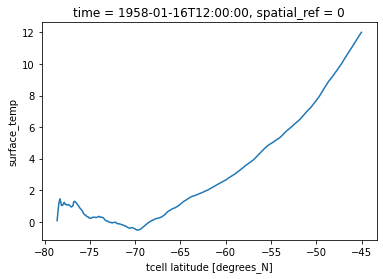

In [12]:
#We should now have one value for each pixel across latitudes. Let's see what this looks like
SO_latSST.plot()

Not bad! We can see that the water gets warmer as it moves towards the equator. But we can improve this plot with a few lines of code.

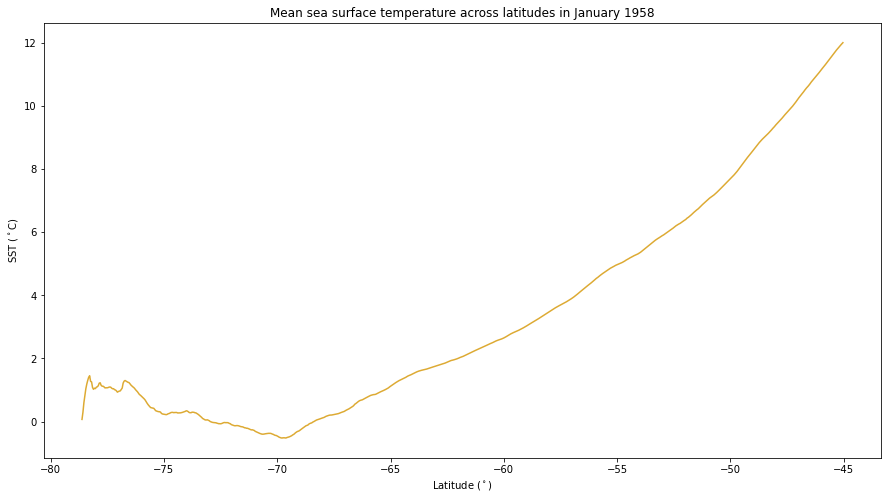

In [13]:
fig = plt.figure(figsize = (15, 8))
latSST_SO = fig.add_subplot(1, 1, 1)
latSST_SO.plot(SO_latSST.yt_ocean, SO_latSST.values, color = '#DDAA33')
latSST_SO.set_ylabel('SST ($^\circ$C)')
latSST_SO.set_xlabel('Latitude ($^\circ$)')
latSST_SO.set_title('Mean sea surface temperature across latitudes in January 1958')

#Once you are happy with your plot, you can save it
plt.savefig('../Data/MyFirstLinePlot.png', dpi = 300)